In [2]:
# Immport Library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [78]:
# Load Data
df = sns.load_dataset("titanic")

In [79]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
# Data Info '
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
df.shape

(891, 15)

- Our Data Have 891 Rows and 15 Colums 

# 1. Null Values 

In [83]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

- Deck Column Have Many Null Values So Its Better To drop this colums 

In [84]:
df.drop(columns="deck", inplace=True)

In [86]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


- Here we drop deck From Our Dataset

In [87]:
df.age.isnull().sum()

177

- Age Colums is Import to us so we cannot drop Thiss Colums Lets impute null values by mean .

In [88]:
mean =df.groupby("pclass")["age"].mean()
mean

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

Lets Impute Age By Class Mean 

In [89]:
# Impute Null Values By Class Mean
df["age"] = df["age"].fillna(df.groupby("pclass")["age"].transform("mean"))

In [90]:
df.age.isnull().sum()

0

- Here We Impute Null Values in Age Colums

In [91]:
df.embark_town.isnull().sum()

2

- Impute null values by Mode 

In [93]:
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [17]:
df.isnull().sum().sort_values(ascending=False)

embarked       2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

- Here We Drop Embarked Colums Also 

In [18]:
df.drop(columns="embarked", inplace=True)

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [20]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

- MileStone 1 .. We Impute all The Null Values 

# 2. Duplicated 

- Lets Check Duplicates values in dataset

In [21]:
df.duplicated().any()

True

In [22]:
df.duplicated().sum()

111

- Here We Have 111 Duplicatedd Values 

In [23]:
# Lets Check Duplicates Values
df[ df.duplicated() ].head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
47,1,3,female,25.14062,0,0,7.7500,Third,woman,False,Queenstown,yes,True
76,0,3,male,25.14062,0,0,7.8958,Third,man,True,Southampton,no,True
77,0,3,male,25.14062,0,0,8.0500,Third,man,True,Southampton,no,True
87,0,3,male,25.14062,0,0,8.0500,Third,man,True,Southampton,no,True
95,0,3,male,25.14062,0,0,8.0500,Third,man,True,Southampton,no,True


In [24]:
df.shape

(891, 13)

- Removing All the Duplicates Values 

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(780, 13)

In [27]:
df.duplicated().sum()

0

MileStone 2. Here We Remove All The Duplicates 

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [29]:
# Removing Pclass and adult_male Colums
df.drop(columns="pclass" , inplace=True)
df.drop(columns="adult_male", inplace=True)
df.drop(columns="alive", inplace=True)


In [94]:
df.shape

(891, 14)

In [100]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


Lets Make A New Colums Category 

In [101]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['Baby', 'child', 'Teen', 'Adult', 'Middle-Aged', 'Old-Aged', 'Senior', 'Elderly']
df["category_age"]= pd.cut(df["age"], bins=bins , labels=labels)

In [102]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,category_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


- Catergory Wise Age Count 

C:\Users\Ali BaBa\AppData\Local\Temp\ipykernel_1432\112658699.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='category_age'>

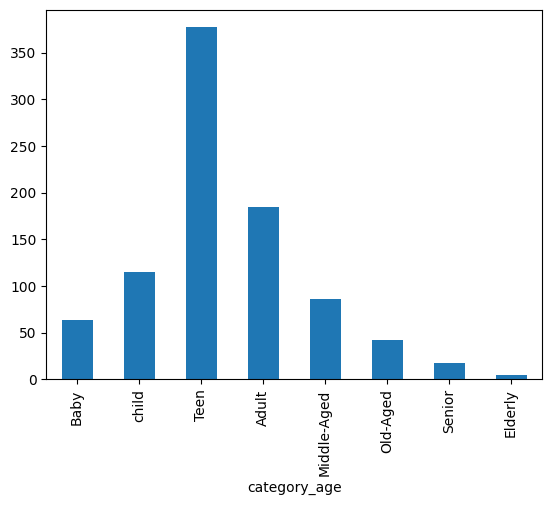

In [103]:
df.groupby("category_age")["age"].count().plot(kind="bar")

- Catergory Wise Fare Check

C:\Users\Ali BaBa\AppData\Local\Temp\ipykernel_1432\3273771574.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: xlabel='category_age'>

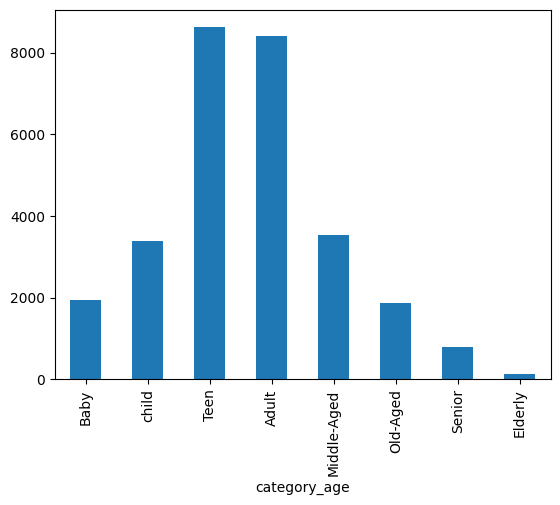

In [104]:
df.groupby("category_age")["fare"].sum().plot(kind="bar")

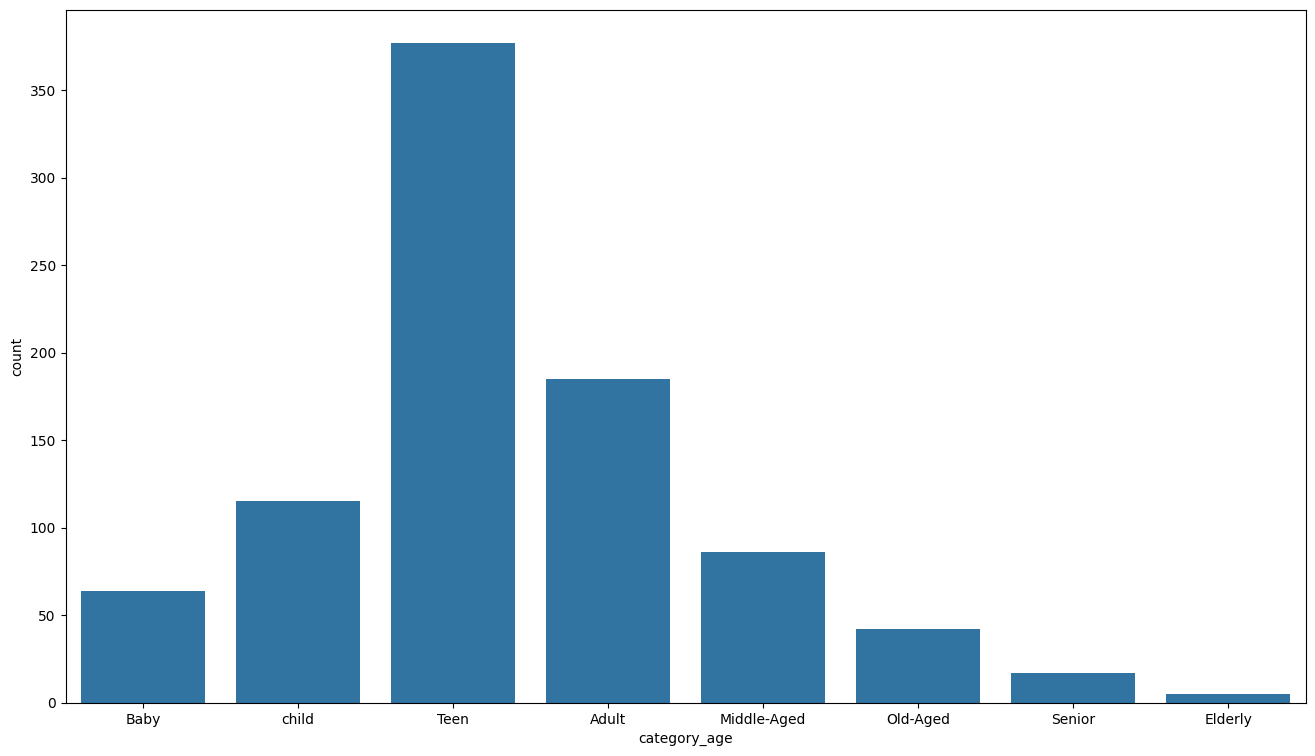

In [110]:
plt.figure(figsize=(16,9))
sns.countplot(data=df, x="category_age")
plt.show()

- Category  Count Using Plotly 

In [113]:
import plotly.express as px

# Assuming you've loaded the penguins dataset into a DataFrame named df

fig = px.histogram(df, x='category_age', color='sex')
fig.update_layout(barmode='group') #  # Adjusts the layout to group bars for each sex

fig.show()


Which Pay More Fare 

In [116]:
import plotly.express as px

# Fig Size 
plt.figure(figsize=(20,9))
# Assuming you've loaded the penguins dataset into a DataFrame named df

fig = px.scatter(df, x='category_age', y="fare" , size = "fare" ,color='sex' , height=700 , width= 1000)
#fig.update_layout(barmode='group')  # Adjusts the layout to group bars for each sex

fig.show()


<Figure size 2000x900 with 0 Axes>

In [121]:
import plotly.express as px

fig = px.box(df, x='category_age', y='fare', title='Fare Comparison by Sex')
#fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.show()


In [39]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,alone,category_age
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,False,Teen
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False,Adult
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,True,Teen
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,False,Adult
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,True,Adult


Survived Counts

In [40]:
import plotly.express as px

# Assuming you've loaded the penguins dataset into a DataFrame named df

fig = px.histogram(df, x='survived', color='sex')
fig.update_layout(barmode='group')  # Adjusts the layout to group bars for each sex

fig.show()


In [41]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,alone,category_age
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,False,Teen
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False,Adult
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,True,Teen
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,False,Adult
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,True,Adult


<Axes: xlabel='survived'>

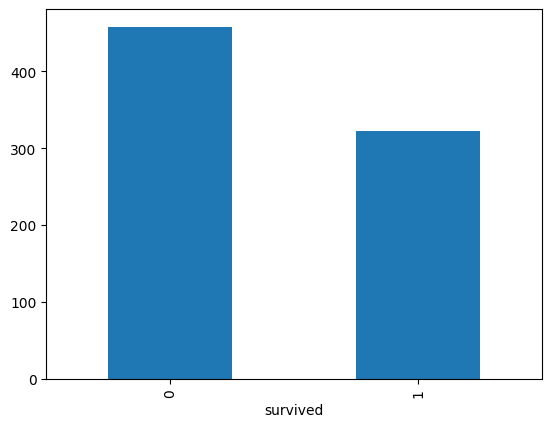

In [42]:
count = df.groupby("survived")["fare"].count().plot(kind="bar")
count

In [43]:
import plotly.graph_objects as go
count = pd.Series([322, 458], index=["Not Survived", "Survived"])

# Create a Plotly bar plot
fig = go.Figure(data=[
    go.Bar(x=count.index, y=count.values)
])

# Update the layout for better visualization
fig.update_layout(
    title="Count of Fares based on Survival",
    xaxis=dict(title='Survival Status'),
    yaxis=dict(title='Fare Count')
)

# Show the plot
fig.show()

 # 3 . Outliers 

In [44]:

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3-Q1
# print(IQR)
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outliers
outliers = [df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]]
print("Outliers:")
print(outliers)

Outliers:
[     survived     sex   age  sibsp  parch      fare   class    who  \
33          0    male  66.0      0      0   10.5000  Second    man   
54          0    male  65.0      0      1   61.9792   First    man   
96          0    male  71.0      0      0   34.6542   First    man   
116         0    male  70.5      0      0    7.7500   Third    man   
275         1  female  63.0      1      0   77.9583   First  woman   
280         0    male  65.0      0      0    7.7500   Third    man   
438         0    male  64.0      1      4  263.0000   First    man   
456         0    male  65.0      0      0   26.5500   First    man   
483         1  female  63.0      0      0    9.5875   Third  woman   
493         0    male  71.0      0      0   49.5042   First    man   
545         0    male  64.0      0      0   26.0000   First    man   
630         1    male  80.0      0      0   30.0000   First    man   
672         0    male  70.0      0      0   10.5000  Second    man   
745      

In [45]:


Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3-Q1
# print(IQR)
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outliers
outliers = [df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]]
print("Outliers:")
print(outliers)

Outliers:
[     survived     sex        age  sibsp  parch      fare  class    who  \
27          0    male  19.000000      3      2  263.0000  First    man   
31          1  female  38.233441      1      0  146.5208  First  woman   
34          0    male  28.000000      1      0   82.1708  First    man   
52          1  female  49.000000      1      0   76.7292  First  woman   
61          1  female  38.000000      0      0   80.0000  First  woman   
..        ...     ...        ...    ...    ...       ...    ...    ...   
829         1  female  62.000000      0      0   80.0000  First  woman   
835         1  female  39.000000      1      1   83.1583  First  woman   
849         1  female  38.233441      1      0   89.1042  First  woman   
856         1  female  45.000000      1      1  164.8667  First  woman   
879         1  female  56.000000      0      1   83.1583  First  woman   

     embark_town  alone category_age  
27   Southampton  False        child  
31     Cherbourg  Fals

# Removing Outliers 

In [46]:
df.shape

(780, 11)

In [47]:

# Remove outliers
titanic_no_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the first few rows of the dataset without outliers
print(titanic_no_outliers.head())


   survived     sex   age  sibsp  parch     fare  class    who  embark_town  \
0         0    male  22.0      1      0   7.2500  Third    man  Southampton   
1         1  female  38.0      1      0  71.2833  First  woman    Cherbourg   
2         1  female  26.0      0      0   7.9250  Third  woman  Southampton   
3         1  female  35.0      1      0  53.1000  First  woman  Southampton   
4         0    male  35.0      0      0   8.0500  Third    man  Southampton   

   alone category_age  
0  False         Teen  
1  False        Adult  
2   True         Teen  
3  False        Adult  
4   True        Adult  


In [48]:
titanic_no_outliers.shape

(778, 11)

In [49]:

# Remove outliers
titanic_no_outliers_ = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]

# Display the first few rows of the dataset without outliers
print(titanic_no_outliers_.head())

   survived     sex   age  sibsp  parch     fare  class    who  embark_town  \
0         0    male  22.0      1      0   7.2500  Third    man  Southampton   
1         1  female  38.0      1      0  71.2833  First  woman    Cherbourg   
2         1  female  26.0      0      0   7.9250  Third  woman  Southampton   
3         1  female  35.0      1      0  53.1000  First  woman  Southampton   
4         0    male  35.0      0      0   8.0500  Third    man  Southampton   

   alone category_age  
0  False         Teen  
1  False        Adult  
2   True         Teen  
3  False        Adult  
4   True        Adult  


In [50]:
titanic_no_outliers.shape

(778, 11)

- Here We Remove Outliers in Datasets

In [51]:
px.box(titanic_no_outliers, x="survived", y="age")

In [52]:
px.box(titanic_no_outliers_, x="sex", y="fare")


Now We Remove Outliers Using Z-score MEthod

In [53]:
# Calculate Z-scores for the 'fare' column
from scipy.stats import zscore
df['fare_zscore'] = zscore(df['fare'])

# Set a threshold for outliers (e.g., Z-score beyond 3)
threshold = 2

# Find the outliers based on the threshold
outliers = df[df['fare_zscore'].abs() > threshold]

# Print or view the outliers
print("Outliers:")
print(outliers)

Outliers:
     survived     sex        age  sibsp  parch      fare  class    who  \
27          0    male  19.000000      3      2  263.0000  First    man   
31          1  female  38.233441      1      0  146.5208  First  woman   
88          1  female  23.000000      3      2  263.0000  First  woman   
118         0    male  24.000000      0      1  247.5208  First    man   
195         1  female  58.000000      0      0  146.5208  First  woman   
258         1  female  35.000000      0      0  512.3292  First  woman   
268         1  female  58.000000      0      1  153.4625  First  woman   
297         0  female   2.000000      1      2  151.5500  First  child   
299         1  female  50.000000      0      1  247.5208  First  woman   
305         1    male   0.920000      1      2  151.5500  First  child   
311         1  female  18.000000      2      2  262.3750  First  woman   
318         1  female  31.000000      0      2  164.8667  First  woman   
332         0    male  38.00

In [54]:
# Set a threshold for outliers (e.g., Z-score beyond 3)
threshold = 3
# Remove outliers from the DataFrame
df_no_outliers = df[(df['fare_zscore'].abs() <= threshold)]

# Drop the 'fare_zscore' column as it's no longer needed
df_no_outliers = df_no_outliers.drop(columns='fare_zscore')

# Output the shape of the DataFrame before and after removing outliers
print("Original DataFrame shape:", df.shape)
print("DataFrame shape without outliers:", df_no_outliers.shape)

Original DataFrame shape: (780, 12)
DataFrame shape without outliers: (760, 11)


In [55]:
px.box(df, x="sex", y="fare")

In [56]:
px.box(df_no_outliers
, x="sex", y="fare")


In [57]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,alone,category_age,fare_zscore
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,False,Teen,-0.528033
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False,Adult,0.697956
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,True,Teen,-0.515109
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,False,Adult,0.349817
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,True,Adult,-0.512716


In [58]:
df.drop(columns="fare_zscore" , inplace=True)

In [59]:
df.drop(columns="alone" , inplace=True)


In [60]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,category_age
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,Teen
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,Adult
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,Teen
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,Adult
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,Adult


# Data-Scaling

- Min-Max Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["scaled_fare"]= scaler.fit_transform(df[["fare"]])
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,category_age,scaled_fare
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,Teen,0.014151
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,Adult,0.139136
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,Teen,0.015469
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,Adult,0.103644
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,Adult,0.015713


In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["scaled_age"]= scaler.fit_transform(df[["age"]])
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,category_age,scaled_fare,scaled_age
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,Teen,0.014151,0.271174
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,Adult,0.139136,0.472229
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,Teen,0.015469,0.321438
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,Adult,0.103644,0.434531
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,Adult,0.015713,0.434531


In [63]:
df.head(
)

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,category_age,scaled_fare,scaled_age
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,Teen,0.014151,0.271174
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,Adult,0.139136,0.472229
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,Teen,0.015469,0.321438
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,Adult,0.103644,0.434531
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,Adult,0.015713,0.434531


In [64]:
px.box(df , x="sex" , y="scaled_age")

# Enconding

Ordinal Encoding

In [65]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['First', 'Second', 'Third']])

df['pclass_encoded'] = ordinal_encoder.fit_transform(df[['class']])

print(df)

     survived     sex       age  sibsp  parch     fare  class    who  \
0           0    male  22.00000      1      0   7.2500  Third    man   
1           1  female  38.00000      1      0  71.2833  First  woman   
2           1  female  26.00000      0      0   7.9250  Third  woman   
3           1  female  35.00000      1      0  53.1000  First  woman   
4           0    male  35.00000      0      0   8.0500  Third    man   
..        ...     ...       ...    ...    ...      ...    ...    ...   
885         0  female  39.00000      0      5  29.1250  Third  woman   
887         1  female  19.00000      0      0  30.0000  First  woman   
888         0  female  25.14062      1      2  23.4500  Third  woman   
889         1    male  26.00000      0      0  30.0000  First    man   
890         0    male  32.00000      0      0   7.7500  Third    man   

     embark_town category_age  scaled_fare  scaled_age  pclass_encoded  
0    Southampton         Teen     0.014151    0.271174        

In [66]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,category_age,scaled_fare,scaled_age,pclass_encoded
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,Teen,0.014151,0.271174,2.0
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,Adult,0.139136,0.472229,0.0
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,Teen,0.015469,0.321438,2.0
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,Adult,0.103644,0.434531,0.0
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,Adult,0.015713,0.434531,2.0


In [67]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [68]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Southampton', 'Cherbourg', 'Queenstown']])
df['embark_encoded'] = ordinal_encoder.fit_transform(df[['embark_town']])
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,category_age,scaled_fare,scaled_age,pclass_encoded,embark_encoded
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,Teen,0.014151,0.271174,2.0,0.0
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,Adult,0.139136,0.472229,0.0,1.0
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,Teen,0.015469,0.321438,2.0,0.0
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,Adult,0.103644,0.434531,0.0,0.0
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,Adult,0.015713,0.434531,2.0,0.0


In [69]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,who,embark_town,category_age,scaled_fare,scaled_age,pclass_encoded,embark_encoded
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,Teen,0.014151,0.271174,2.0,0.0
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,Adult,0.139136,0.472229,0.0,1.0
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,Teen,0.015469,0.321438,2.0,0.0
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,Adult,0.103644,0.434531,0.0,0.0
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,Adult,0.015713,0.434531,2.0,0.0


- Now Remove Categorical columns

In [70]:
df.drop(columns="sex", inplace=True)
df.drop(columns="class", inplace=True)
df.drop(columns="embark_town", inplace=True)
df.drop(columns="who", inplace=True)



In [71]:
df.head()

,survived,age,sibsp,parch,fare,category_age,scaled_fare,scaled_age,pclass_encoded,embark_encoded
0,0,22.0,1,0,7.2500,Teen,0.014151,0.271174,2.0,0.0
1,1,38.0,1,0,71.2833,Adult,0.139136,0.472229,0.0,1.0
2,1,26.0,0,0,7.9250,Teen,0.015469,0.321438,2.0,0.0
3,1,35.0,1,0,53.1000,Adult,0.103644,0.434531,0.0,0.0
4,0,35.0,0,0,8.0500,Adult,0.015713,0.434531,2.0,0.0


In [72]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Baby', 'child', 'Teen', 'Adult', 'Middle-Aged', 'Old-Aged', 'Senior', 'Elderly']])
df['category_age_encoded'] = ordinal_encoder.fit_transform(df[['category_age']])
df.head()

,survived,age,sibsp,parch,fare,category_age,scaled_fare,scaled_age,pclass_encoded,embark_encoded,category_age_encoded
0,0,22.0,1,0,7.2500,Teen,0.014151,0.271174,2.0,0.0,2.0
1,1,38.0,1,0,71.2833,Adult,0.139136,0.472229,0.0,1.0,3.0
2,1,26.0,0,0,7.9250,Teen,0.015469,0.321438,2.0,0.0,2.0
3,1,35.0,1,0,53.1000,Adult,0.103644,0.434531,0.0,0.0,3.0
4,0,35.0,0,0,8.0500,Adult,0.015713,0.434531,2.0,0.0,3.0


In [73]:
df.drop(columns="category_age", inplace=True)


In [74]:
df.head()

,survived,age,sibsp,parch,fare,scaled_fare,scaled_age,pclass_encoded,embark_encoded,category_age_encoded
0,0,22.0,1,0,7.2500,0.014151,0.271174,2.0,0.0,2.0
1,1,38.0,1,0,71.2833,0.139136,0.472229,0.0,1.0,3.0
2,1,26.0,0,0,7.9250,0.015469,0.321438,2.0,0.0,2.0
3,1,35.0,1,0,53.1000,0.103644,0.434531,0.0,0.0,3.0
4,0,35.0,0,0,8.0500,0.015713,0.434531,2.0,0.0,3.0
